In [2]:
from qiskit import QuantumCircuit

In [3]:
qc = QuantumCircuit(3,3)

In [4]:
qc.x(0)
qc.z(0)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

In [5]:
qc.draw()

┌───┐┌───┐ ░ 
q_0: ┤ X ├┤ Z ├─░─
     └───┘└───┘ ░ 
q_1: ───────────░─
                ░ 
q_2: ───────────░─
                ░ 
c: 3/═════════════

In [6]:
qc.h(1)
qc.cx(control_qubit=1,target_qubit=2)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

In [7]:
qc.draw()

┌───┐┌───┐ ░            ░ 
q_0: ┤ X ├┤ Z ├─░────────────░─
     └───┘└───┘ ░ ┌───┐      ░ 
q_1: ───────────░─┤ H ├──■───░─
                ░ └───┘┌─┴─┐ ░ 
q_2: ───────────░──────┤ X ├─░─
                ░      └───┘ ░ 
c: 3/══════════════════════════

In [8]:
qc.cx(0,1)
qc.h(0)
qc.measure(0,0)
qc.measure(1,1)
qc.cx(1,2)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

In [9]:
qc.draw()

┌───┐┌───┐ ░            ░      ┌───┐┌─┐      ░ 
q_0: ┤ X ├┤ Z ├─░────────────░───■──┤ H ├┤M├──────░─
     └───┘└───┘ ░ ┌───┐      ░ ┌─┴─┐└┬─┬┘└╥┘      ░ 
q_1: ───────────░─┤ H ├──■───░─┤ X ├─┤M├──╫───■───░─
                ░ └───┘┌─┴─┐ ░ └───┘ └╥┘  ║ ┌─┴─┐ ░ 
q_2: ───────────░──────┤ X ├─░────────╫───╫─┤ X ├─░─
                ░      └───┘ ░        ║   ║ └───┘ ░ 
c: 3/═════════════════════════════════╩═══╩═════════
                                      1   0

we can verify the results by applying the sames gates to prepare the quibits in the first section but in reverse order

In [10]:
qc.z(2)
qc.x(2)
qc.measure(2,2)

In [11]:
qc.draw()

┌───┐┌───┐ ░            ░      ┌───┐┌─┐      ░              
q_0: ┤ X ├┤ Z ├─░────────────░───■──┤ H ├┤M├──────░──────────────
     └───┘└───┘ ░ ┌───┐      ░ ┌─┴─┐└┬─┬┘└╥┘      ░              
q_1: ───────────░─┤ H ├──■───░─┤ X ├─┤M├──╫───■───░──────────────
                ░ └───┘┌─┴─┐ ░ └───┘ └╥┘  ║ ┌─┴─┐ ░ ┌───┐┌───┐┌─┐
q_2: ───────────░──────┤ X ├─░────────╫───╫─┤ X ├─░─┤ Z ├┤ X ├┤M├
                ░      └───┘ ░        ║   ║ └───┘ ░ └───┘└───┘└╥┘
c: 3/═════════════════════════════════╩═══╩════════════════════╩═
                                      1   0                    2

### What happened above
#### first section
Alice prepares quibit

#### second section
entangles 2 qubits where q1 belongs to alice and q2 belongs to bob.

#### third section
where alice entnagles her prepared qubit q0 with her shared qubit q1 and then make a mesurement of the results of her 2 qubits

In [16]:
from qiskit_aer import Aer

In [17]:
from qiskit_aer import AerSimulator

# Create simulator
simulator = AerSimulator()

job = simulator.run(qc, shots=1024)

In [18]:
result = job.result()

In [19]:
result.get_counts()

{'001': 253, '010': 254, '000': 253, '011': 264}

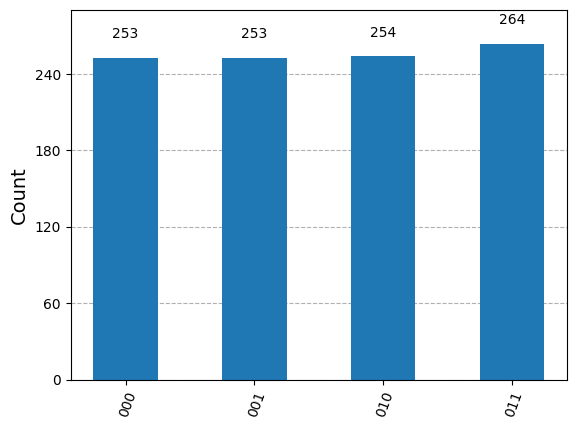

In [20]:
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts())